In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1 Importing final dataset

In [161]:
file = 'mean_replaced_nan_df.csv'
df = pd.read_csv(file)

In [162]:
df

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,7.083337,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...,...
3271,3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


___

## #2 Data Visualization

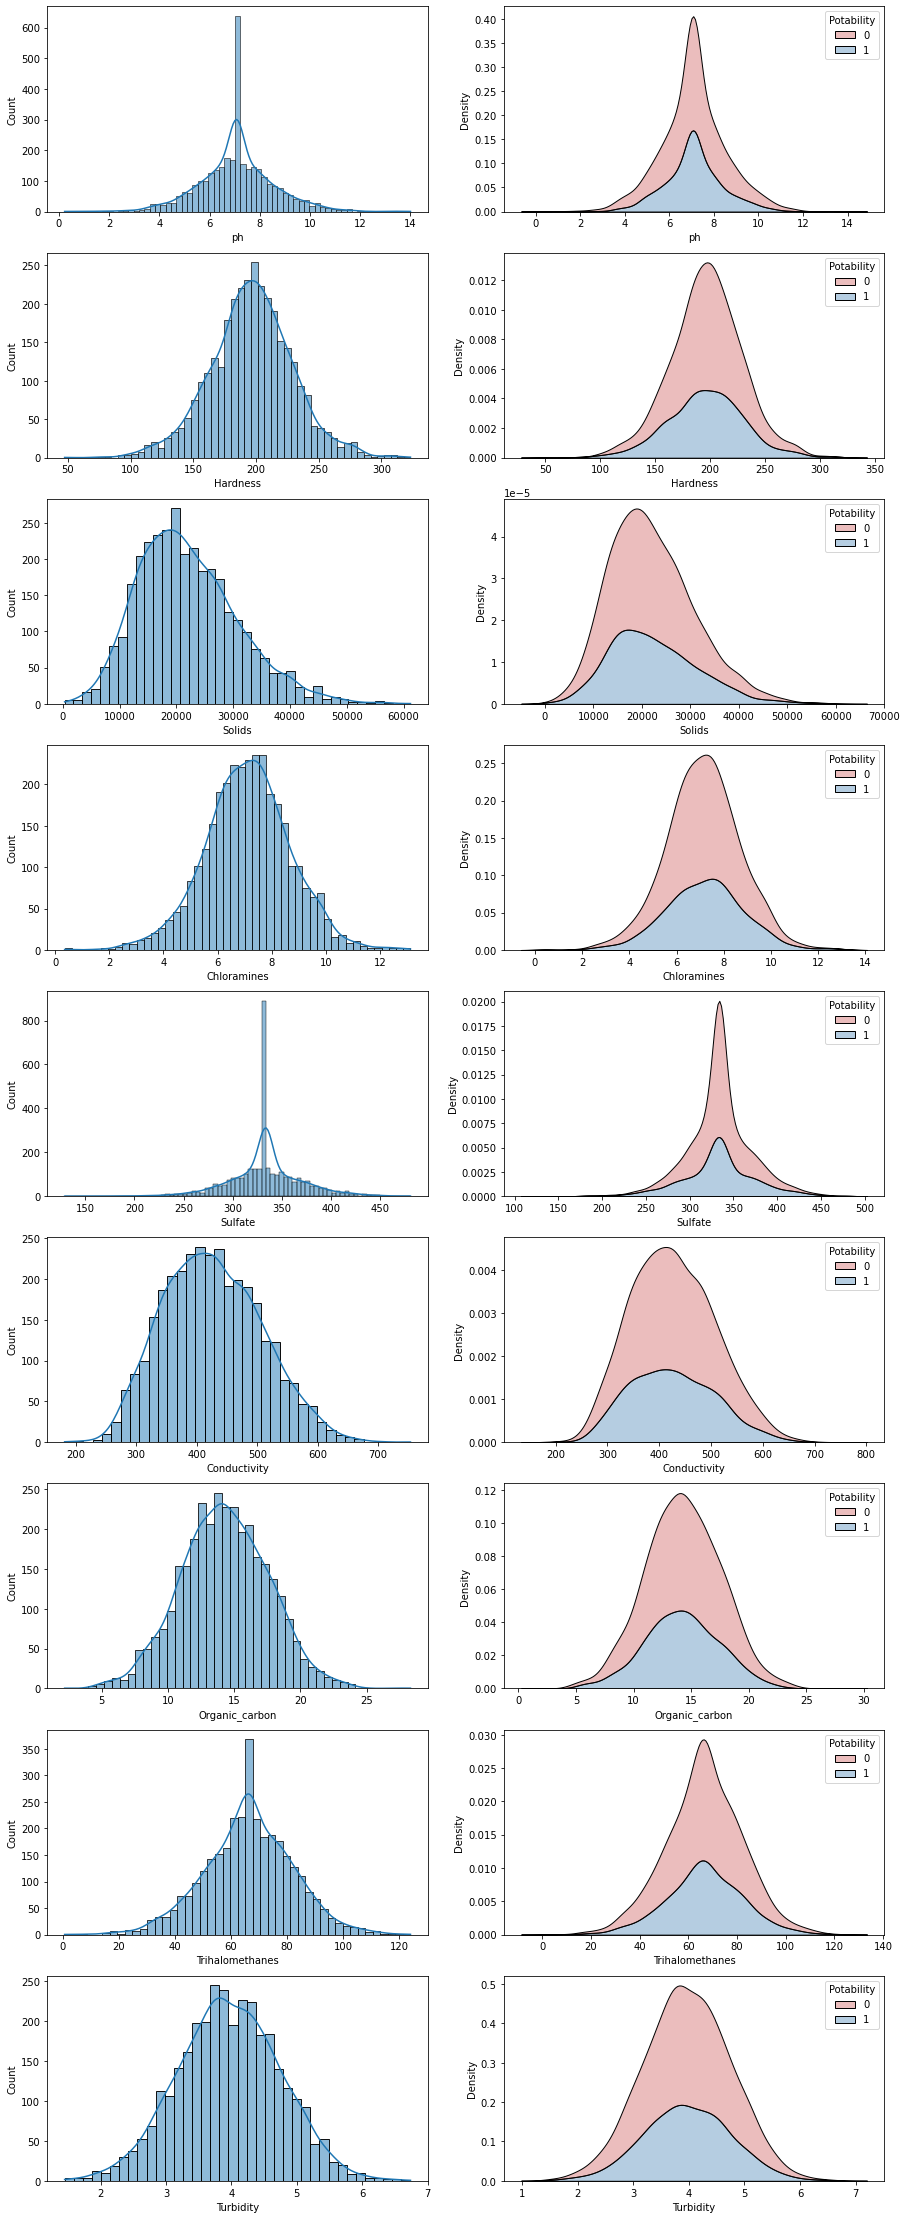

In [163]:
#Creating a list of features from the dataset to iterate through 
features = list(df.columns.drop(['Unnamed: 0','Potability']))

#Establishing plots and plot sizes
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(15, 40))
i = 0

#Creating loop to generate KDE plot and histogram for each feature
for col in features: 
    sns.histplot(df, x=col, kde=True, ax = ax[i,0]) 
    
    #Setting hue as 'Potability' to see how it is affected
    sns.kdeplot(df[col], fill=True, alpha=0.4, hue = df.Potability, 
    palette=('indianred', 'steelblue'), multiple='stack', ax=ax[i,1])
    
    i = i + 1

**The NaN values that were replaced by the means seem to be skewing the distribution of the data... I will test to see how replacing them with KNN Imputation (as opposed to the mean) works.**

In [164]:
#Importing KNN Imputer and the original dataset
from sklearn.impute import KNNImputer
file2 = 'water_potability.csv'
df2 = pd.read_csv(file2)

In [165]:
#Setting up the imputer and applying it to the original dataset
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)

In [171]:
#Previewing the new dataframe
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.156857,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,336.094350,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,330.449166,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


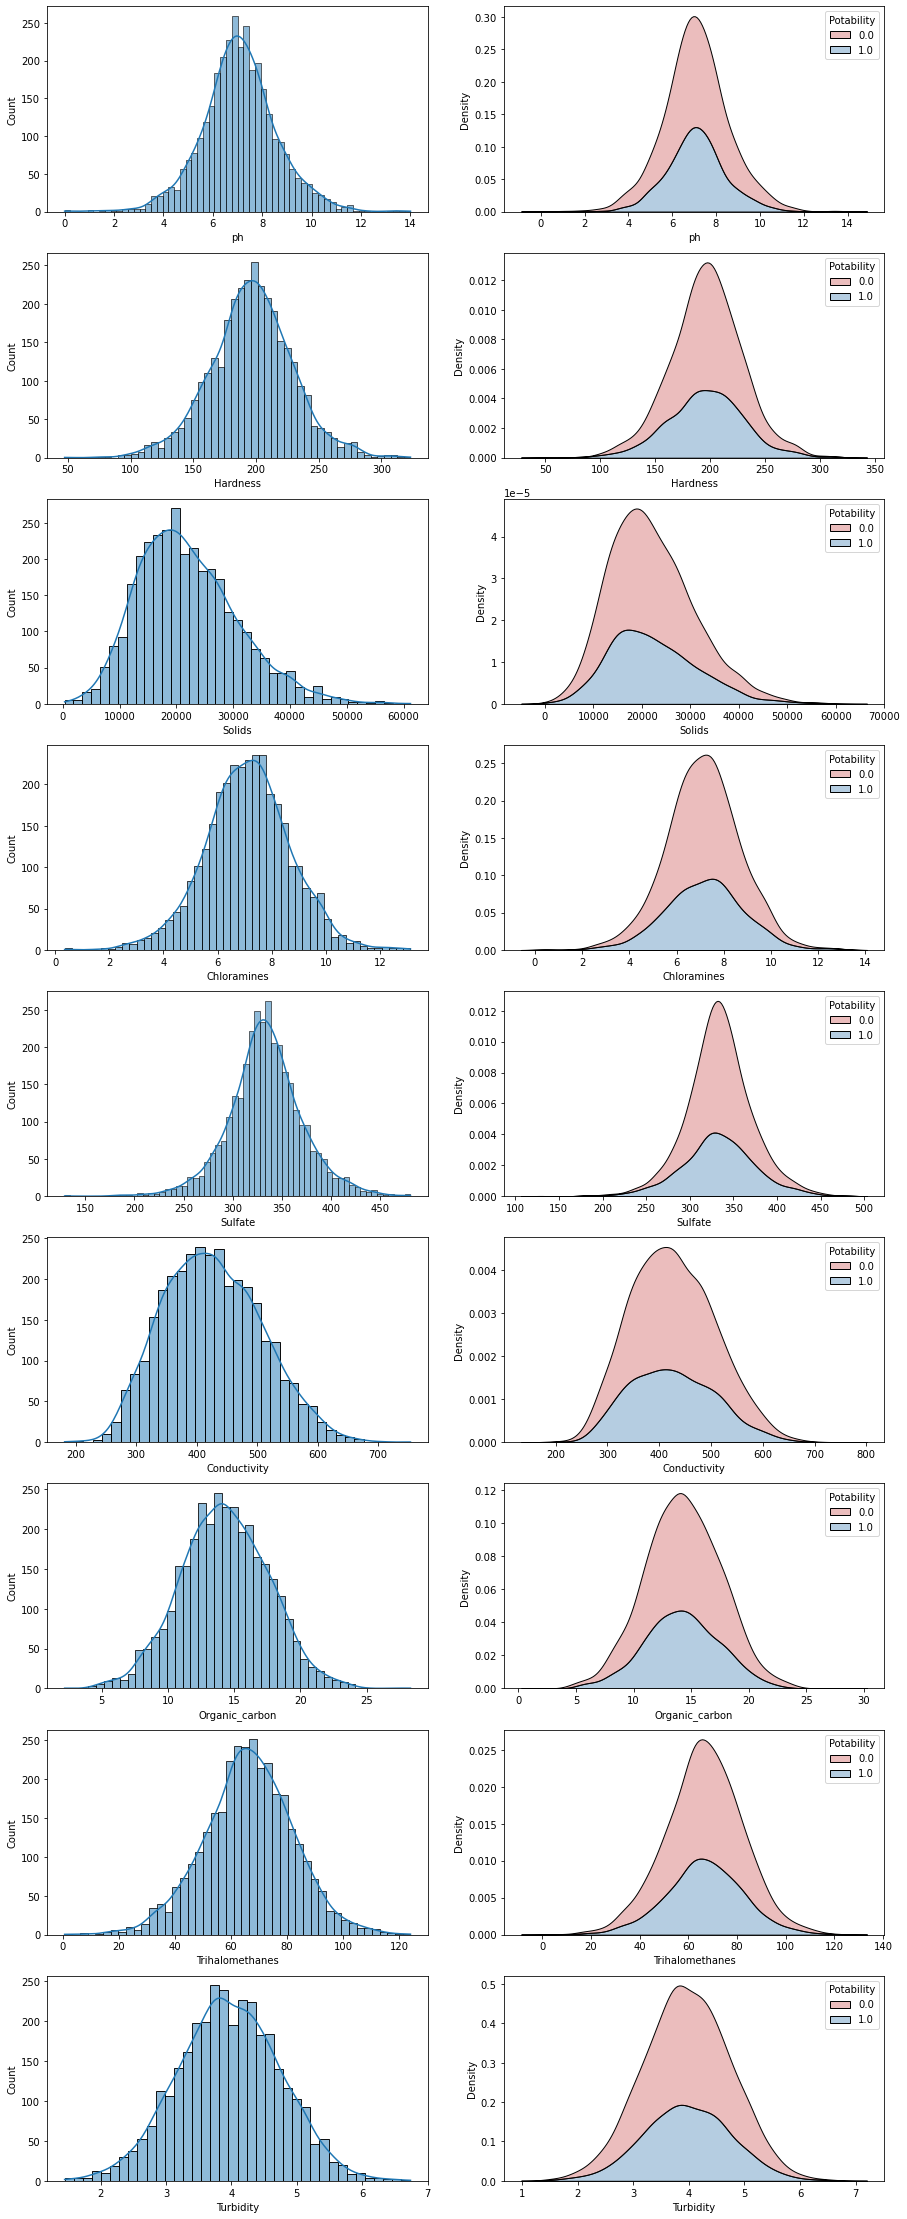

In [166]:
#Establishing plots and plot sizes
fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(15, 40))
i2 = 0

#Creating loop to generate KDE plot and histogram for each feature
for col in features: 
    sns.histplot(df2, x=col, kde=True, ax = ax[i2,0])
    
    #Setting hue as 'Potability' to see how it is affected
    sns.kdeplot(df2[col], fill=True, alpha=0.4, hue = df2.Potability, 
    palette=('indianred', 'steelblue'), multiple='stack', ax=ax[i2,1])
    
    i2 = i2 + 1

**Using KNNImputer to replace the NaN values seems to have smoothed out a lot of the data. Will save as the final dataframe for modeling in the next stage of the project.**

In [167]:
df2.to_csv('final_df.csv')

___

## #3 Assessing correlation between features in the dataset

In [169]:
#Creating a correlation matrix to determine how correlated features are in the dataset.
corr_matrix = df2.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.080383,-0.100512,-0.028970,0.027832,0.018234,0.035420,-0.002337,-0.032971,-0.002920
Hardness,0.080383,1.000000,-0.046899,-0.030054,-0.101627,-0.023915,0.003610,-0.014199,-0.014449,-0.013837
Solids,-0.100512,-0.046899,1.000000,-0.070148,-0.190596,0.013831,0.010242,-0.003769,0.019546,0.033743
Chloramines,-0.028970,-0.030054,-0.070148,1.000000,0.033203,-0.020486,-0.012653,0.014224,0.002363,0.023779
Sulfate,0.027832,-0.101627,-0.190596,0.033203,1.000000,-0.014102,0.027612,-0.024026,-0.012605,-0.022108
Conductivity,0.018234,-0.023915,0.013831,-0.020486,-0.014102,1.000000,0.020966,0.001564,0.005798,-0.008128
Organic_carbon,0.035420,0.003610,0.010242,-0.012653,0.027612,0.020966,1.000000,-0.012044,-0.027308,-0.030001
Trihalomethanes,-0.002337,-0.014199,-0.003769,0.014224,-0.024026,0.001564,-0.012044,1.000000,-0.024393,0.006918
Turbidity,-0.032971,-0.014449,0.019546,0.002363,-0.012605,0.005798,-0.027308,-0.024393,1.000000,0.001581
Potability,-0.002920,-0.013837,0.033743,0.023779,-0.022108,-0.008128,-0.030001,0.006918,0.001581,1.000000


<AxesSubplot:>

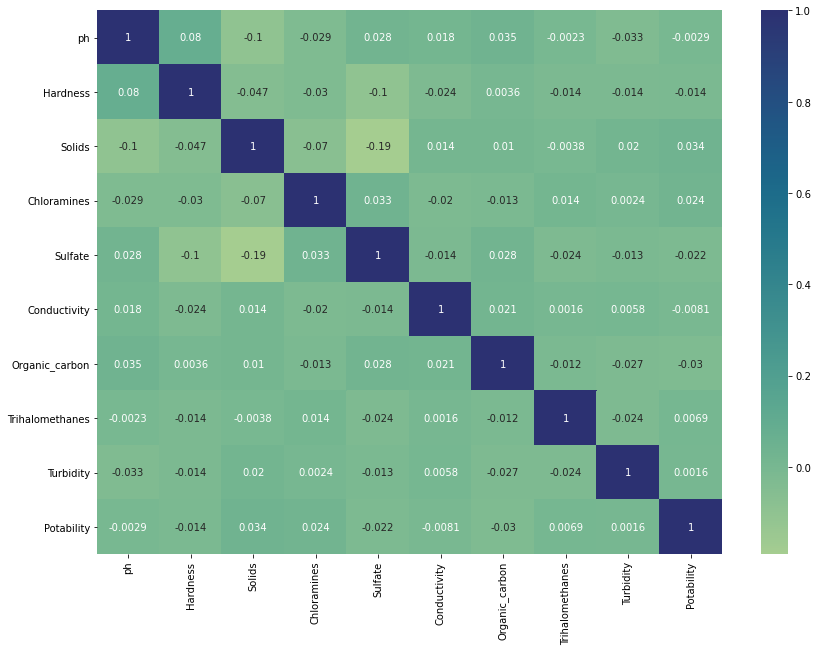

In [170]:
plt.subplots(figsize=(14,10))
sns.heatmap(corr_matrix, cmap = 'crest', annot = True)

**There is no multicollinearity among features in the dataset because none of the Pearson's Correlation Coefficients are close to -1 or 1. Next I will create a list of the features and how they correlate with the target feature, Potability.**

In [186]:
#Instantiate an empty list of correlation values
corr = list()

#Looping through the previous list of features to determine correlation with target feature, 'Potability'
for cols in features:
    corr.append(df2[cols].corr(df2['Potability']))
    
#Converting new correlation list to a pandas dataframe
corr_df = pd.DataFrame({'Features' : features, 'corr': corr})

#Finding the absolute values to be able to correctly order values 
corr_df['corr'] = corr_df['corr'].abs()

#Ordering the values in descending orders to see which features are most correlated with the target feature
corr_df.sort_values(by = 'corr', ascending = False)

,Features,corr
2,Solids,0.033743
6,Organic_carbon,0.030001
3,Chloramines,0.023779
4,Sulfate,0.022108
1,Hardness,0.013837
5,Conductivity,0.008128
7,Trihalomethanes,0.006918
0,ph,0.002920
8,Turbidity,0.001581
